In [1]:
import torch
import json
import torch.nn as nn
import os
from utils import get_dataloader
from dataset import BratsDataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = 'ch3_32_interval_3_240'
_model = torch.load(os.path.join('models', model_name, f"{model_name}.pth"))
_model = _model.to(device)
model = nn.DataParallel(_model).to(device)
model.eval()
test_dataloader = get_dataloader(dataset=BratsDataset, phase="test", img_depth=64, img_width=240, 
                                data_type=
                                ["-t1n.nii.gz",
                                 "-t1c.nii.gz",
                                 #   "-t2w.nii.gz",
                                "-t2f.nii.gz"], batch_size=1)

In [7]:
data_batch = next(iter(test_dataloader))
batch_id, images, targets = data_batch['Id'], data_batch['image'], data_batch['mask']
print(batch_id)

['BraTS-GLI-01085-000']


In [8]:
images = images.to(device)
targets = targets.detach().numpy()
logits = model(images)
pred = torch.sigmoid(logits).detach().cpu().numpy()
threshold = 0.33
pred = (pred >= threshold).astype(int)

In [9]:
pred_img = pred[0]
target_img = targets[0]
pred_img.shape, target_img.shape

((3, 155, 240, 240), (3, 155, 240, 240))

In [10]:
import matplotlib.pyplot as plt
classes = ['WT', 'TC', 'ET']
def comp_gt_pred(pred, gt, slide2show=75):
    plt.suptitle(slide2show)
    for i, clas in enumerate(classes):
        plt.subplot(2,3,i+1)
        plt.title(f'GT of {clas}')
        plt.imshow(gt[i][slide2show], cmap='gray')
        plt.axis('off')
        plt.subplot(2,3,i+1+3)
        plt.title(f'prediction of {clas}')
        plt.axis('off')
        plt.imshow(pred[i][slide2show], cmap='gray')
    plt.show()

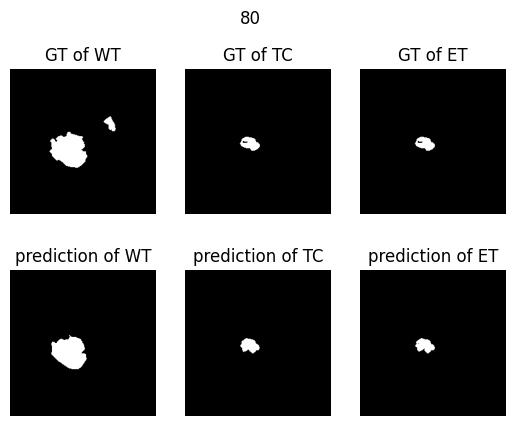

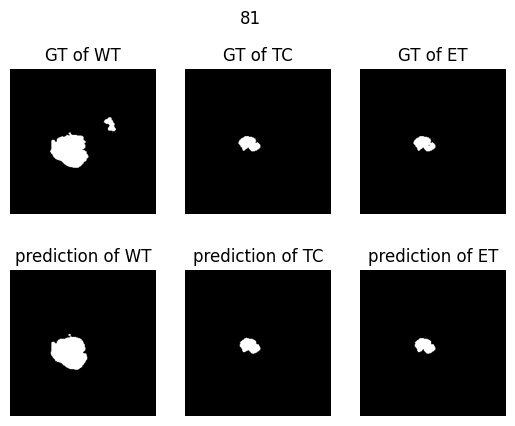

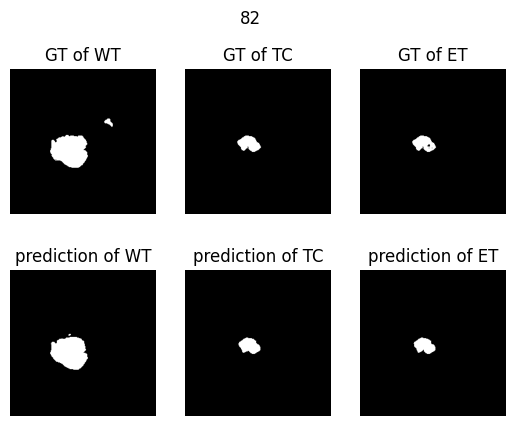

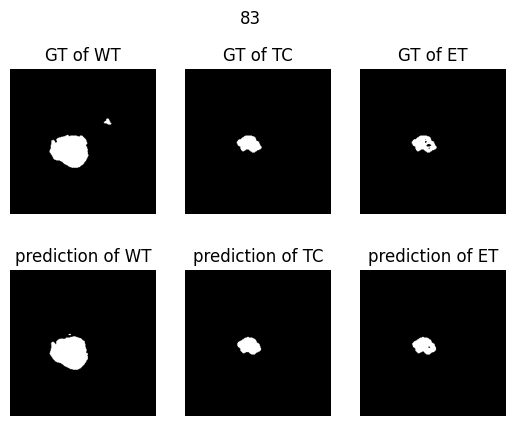

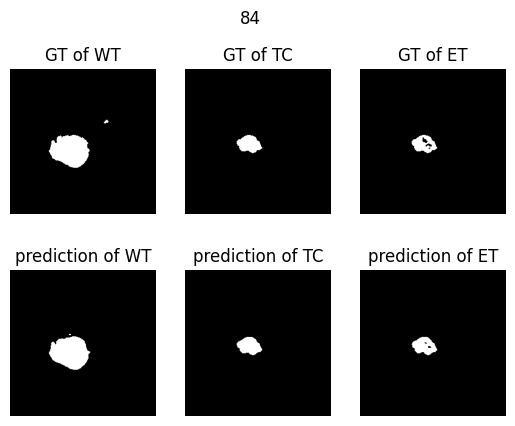

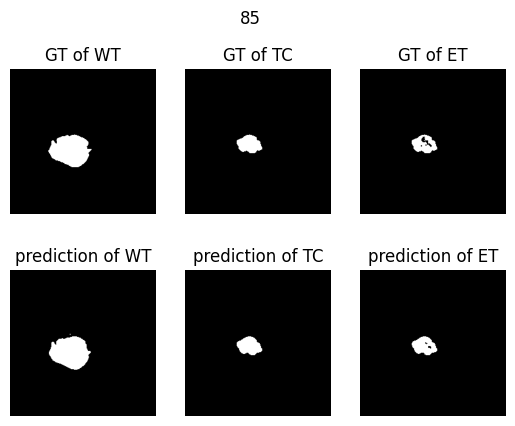

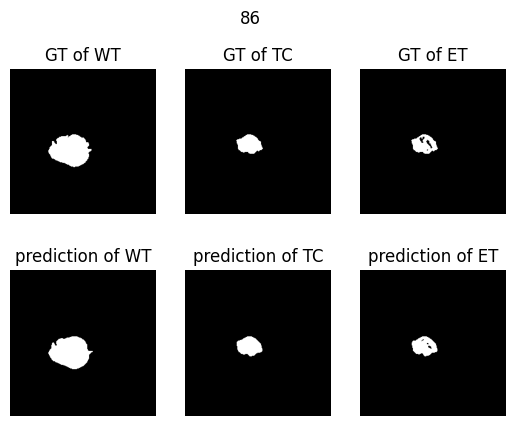

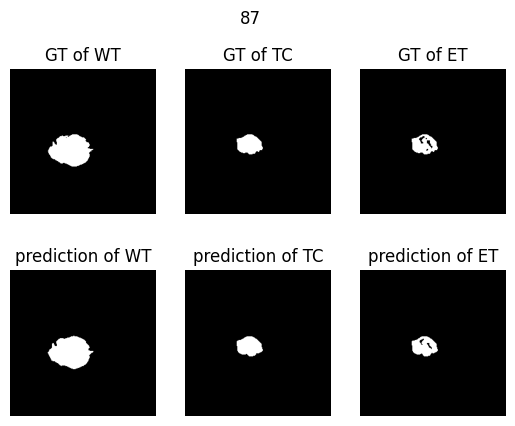

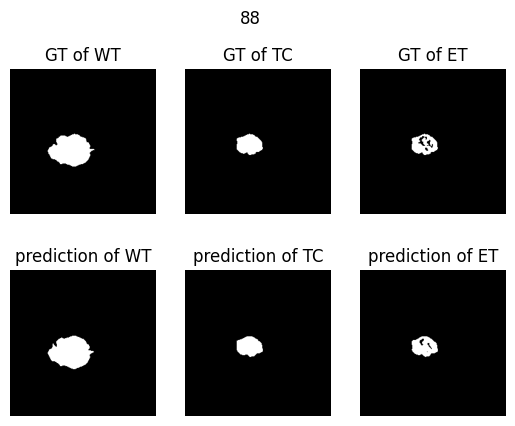

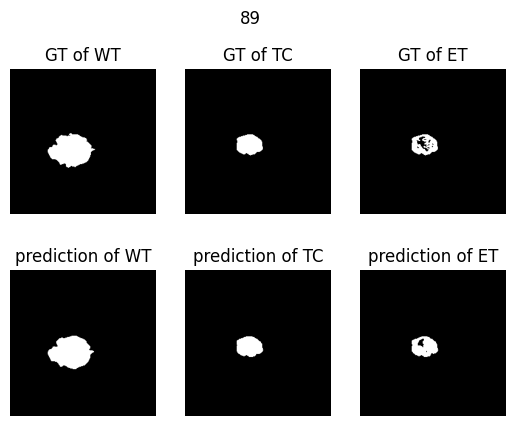

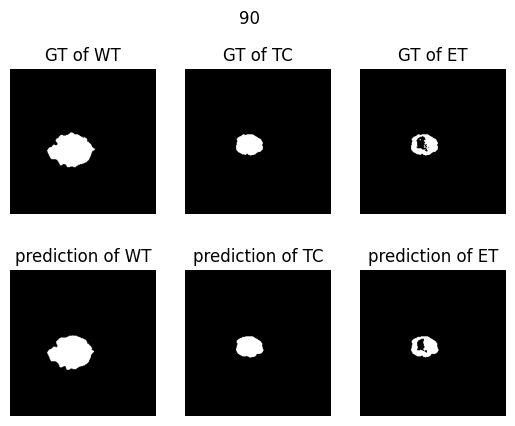

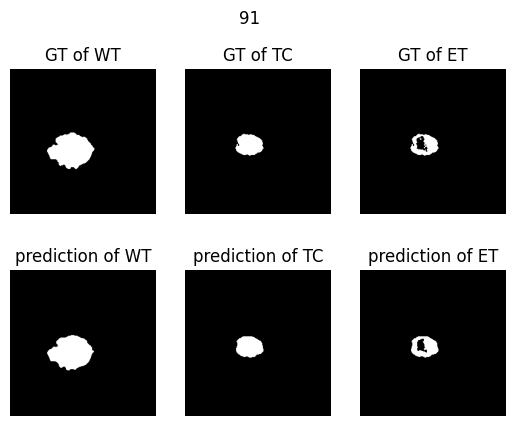

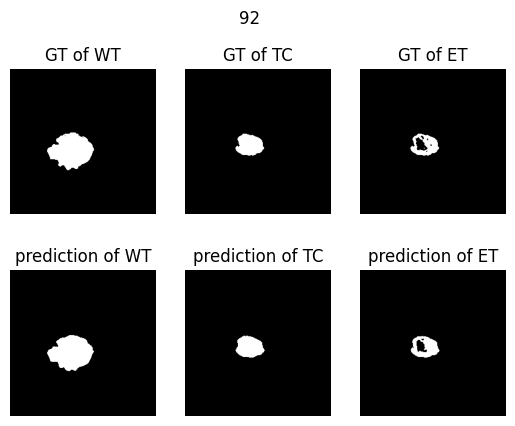

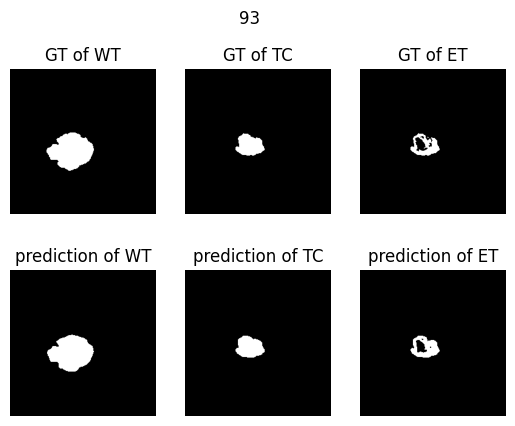

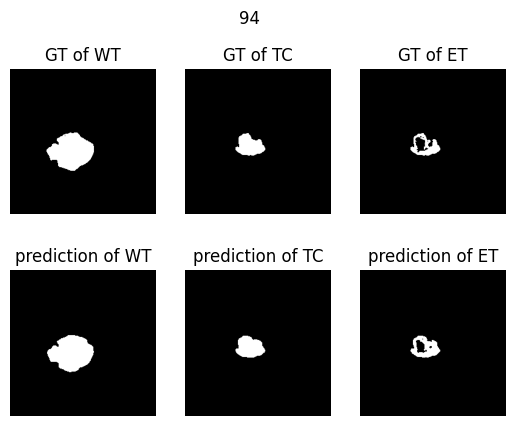

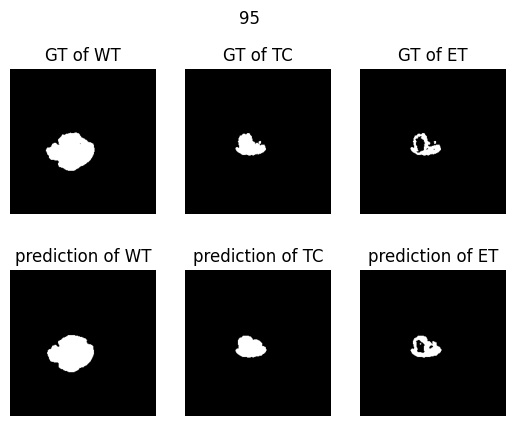

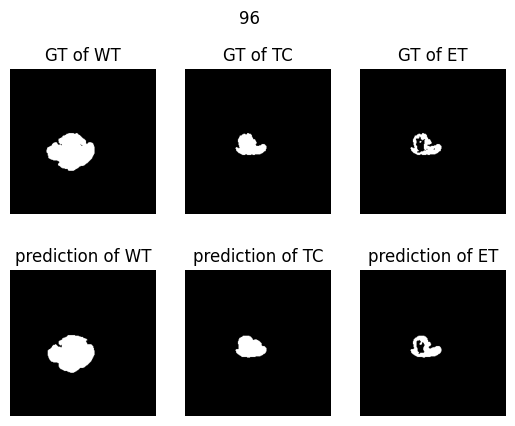

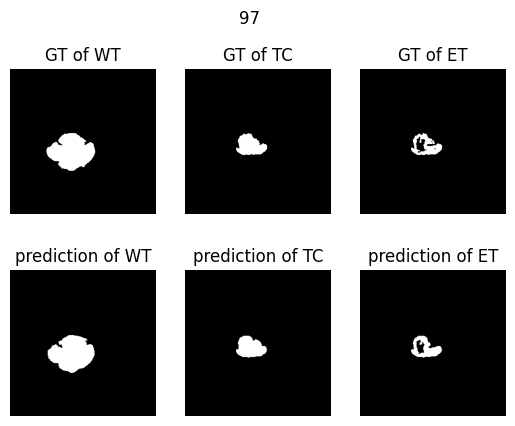

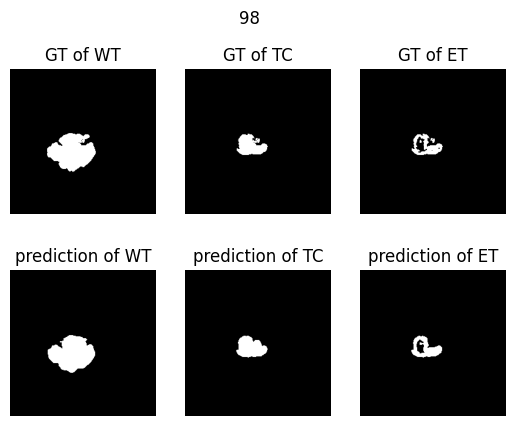

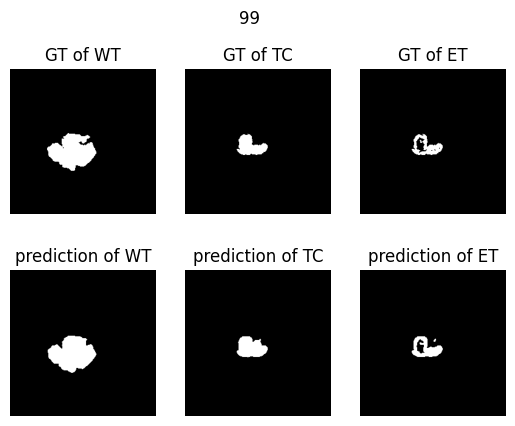

In [11]:
for i in range(80, 100):
    comp_gt_pred(pred_img, target_img, i)

In [12]:
id_ = batch_id[0]
plt_save_path = f"out/{id_}/{model_name}/"
os.makedirs(plt_save_path)
slide2show = 85

In [13]:
for i, clas in enumerate(classes):
    plt.imsave(f"{plt_save_path}/{slide2show}_Pred_{clas}.png", pred_img[i][slide2show], cmap='gray')
    plt.imsave(f"{plt_save_path}/{slide2show}_GT_{clas}.png", target_img[i][slide2show], cmap='gray')

torch.Size([1, 3, 52, 240, 240])